In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [99]:
# FUNCTION DEFINITION: function to create DataFrameMatrix with define row_name and col_name 
def matrix_maker_function(dataframe,row_name,col_name):
    df = dataframe.filter([row_name,col_name,'val'], axis=1)
    matrix_df = pd.pivot_table(df,index=[row_name],values=["val"],columns=[col_name], aggfunc='sum')             
    matrix_df = pd.DataFrame(matrix_df.to_records())                                  
    matrix_df.columns = [hdr.replace("('val', ", "").replace(")", "") \
                     for hdr in matrix_df.columns]
    return matrix_df

In [100]:
def my_plot_function(x_values,y_values,x_label,y_label,title):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    rSqr = rvalue*rvalue
    #print(f"The r-squared is: {rSqr}")
    
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    scataxis = plt.subplot()
    scataxis.scatter(x_values, y_values, color = "turquoise", edgecolors= "teal")
    scataxis.set_ylim([0-(max(y_values)*0.05), max(y_values)*1.1])
    
    plt.plot(x_values,regress_values,"r-", alpha = .5, color='red')
    plt.annotate(line_eq,(min(x_values),5),fontsize=12,color="red")

    plt.grid(alpha = .2)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'{title}')
    
    plt.savefig(f"GHDx/Images/{title}.png")
    plt.show()

In [101]:
#Read main file - IHME-GBD_2017_DATA-ba7d53b0-1 (without age group)
file = pd.read_csv("GHDx/Resources/IHME-GBD_2017_DATA-ba7d53b0-1.csv")            # Read the file
file.replace(['Taiwan (Province of China)'], ['Taiwan'],inplace=True)

In [102]:
# DEATH BY SUICIDE RATE/100,000 pop MATRIX
# Create base dataframe for Suicide Rate for all countries ; CauseNo = 718 for selfharm/suicide, MetricId = 3 Rate 
suicide_df = file[(file["measure_id"]==1) & (file["sex_id"]==3) &
                  (file["cause_id"] == 718) & (file["metric_id"]==3)].round(2)

#create matrix
suicide_rate_df = matrix_maker_function(suicide_df ,'location_name','year')
suicide_rate_df.rename(columns={"location_name":"Country Name"}, inplace=True)
suicide_rate_df.set_index('Country Name',inplace=True)
suicide_rate_df.to_csv("GHDx/Outputs/suicide_rate_df.csv", index=True)
suicide_rate_df.sort_values(by='2017', ascending=False).head(10)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,
Greenland,109.30,103.80,98.70,94.88,91.48,88.25,86.35,85.09,83.30,81.22,...,71.39,70.68,69.81,68.01,66.43,65.65,64.65,59.53,58.28,57.61
Lithuania,31.02,34.24,36.51,43.91,49.22,50.17,48.19,46.11,46.28,45.92,...,44.69,39.99,39.42,38.93,38.64,39.78,37.98,37.25,36.36,36.27
Ukraine,22.60,24.52,27.01,29.25,32.50,37.10,37.35,35.95,33.84,34.91,...,31.31,26.51,24.62,23.76,24.19,24.99,24.80,34.05,33.28,30.61
Russian Federation,31.44,32.93,38.44,49.27,56.37,54.21,49.58,45.31,44.50,49.03,...,42.09,38.91,38.53,35.41,34.22,33.32,33.55,31.91,30.44,30.03
South Korea,10.70,10.66,10.69,11.15,12.02,13.09,14.47,15.67,17.53,18.28,...,31.54,33.49,34.33,34.25,33.43,32.51,31.30,30.23,29.04,28.91
Lesotho,16.84,16.31,16.07,15.87,16.03,16.10,16.38,17.04,18.19,19.31,...,27.89,27.63,27.71,27.64,27.90,28.17,28.21,28.08,27.25,26.27
Suriname,21.23,21.98,22.59,23.67,23.43,22.16,21.61,22.02,22.33,22.96,...,26.82,26.61,26.59,26.25,25.98,25.75,25.30,25.65,25.51,25.68
Guyana,17.87,18.54,17.59,16.96,17.04,19.01,19.66,20.71,22.85,22.12,...,23.97,23.97,26.28,27.58,28.32,27.88,27.05,26.41,25.92,25.52
Kiribati,24.12,23.96,23.54,25.33,24.55,24.09,24.12,24.13,24.32,24.54,...,25.84,26.09,26.22,26.25,26.19,26.07,25.90,25.69,25.47,25.17


In [103]:
#suicide_rate_df.sort_values(by='1990', ascending=False)
#print(suicide_rate_df.sort_values(by='2017', ascending=False)['Country Name'].head())

In [104]:
# DEPRESSION (by Incidents) RATE/100,000 pop MATRIX 
# Create base dataframe for Depression for all countries ; CauseNo = 567 Depressive disorders , measure_id = 6 Incidence
depression_df = file[(file["sex_id"]==3) & (file["metric_id"]==3) & (file["measure_id"]==6) & (file["cause_id"] == 567)].round()

#create matrix
depression_df = matrix_maker_function(depression_df ,'location_name','year')
depression_df.rename(columns={"location_name":"Country Name"}, inplace=True)
depression_df.set_index('Country Name',inplace=True)
depression_df.to_csv("GHDx/Outputs/depression_df.csv", index=True)
depression_df.sort_values(by='2017', ascending=False).head(1)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,
Greenland,7109.0,7164.0,7198.0,7219.0,7207.0,7176.0,7130.0,7087.0,7049.0,7010.0,...,6965.0,6961.0,6955.0,6930.0,6892.0,6851.0,6785.0,6714.0,6628.0,6540.0


In [105]:
# ANXIETY (by Incidents) RATE/100,000 pop MATRIX 
# Create base dataframe for Depression for all countries ; CauseNo = 571 Anxiety disorders , measure_id = 6 Incidence
Anxiety_df = file[(file["sex_id"]==3) & (file["metric_id"]==3) & (file["measure_id"]==6) & (file["cause_id"] == 571)].round()

#create matrix
Anxiety_df = matrix_maker_function(Anxiety_df ,'location_name','year')
Anxiety_df.rename(columns={"location_name":"Country Name"}, inplace=True)
Anxiety_df.set_index('Country Name',inplace=True)
Anxiety_df.to_csv("GHDx/Outputs/Anxiety_df.csv", index=True)
Anxiety_df.sort_values(by='2017', ascending=False).head(1)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,
Iran,863.0,867.0,872.0,877.0,882.0,886.0,889.0,892.0,893.0,894.0,...,895.0,895.0,892.0,887.0,882.0,876.0,870.0,864.0,858.0,851.0


In [106]:
# DEPRESSION AND ANXIETY (by Incidents) RATE/100,000 pop MATRIX 
# Create base dataframe for Depression for all countries ; CauseNo = 571 Anxiety disorders , measure_id = 6 Incidence
dep_anx_df = file[(file["sex_id"]==3) & (file["metric_id"]==3) & (file["measure_id"]==6)].round()
dep_anx_df = dep_anx_df[(dep_anx_df["cause_id"] == 567) | (dep_anx_df["cause_id"] == 571)]
dep_anx_df
#create matrix
dep_anx_df = matrix_maker_function(dep_anx_df ,'location_name','year')
dep_anx_df.rename(columns={"location_name":"Country Name"}, inplace=True)
dep_anx_df.set_index('Country Name',inplace=True)
dep_anx_df.to_csv("GHDx/Outputs/dep_anx_df.csv", index=True)
dep_anx_df.sort_values(by='2017', ascending=False).head(10)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,
Greenland,7894.0,7947.0,7979.0,7997.0,7985.0,7954.0,7909.0,7866.0,7829.0,7791.0,...,7736.0,7728.0,7719.0,7690.0,7648.0,7603.0,7533.0,7460.0,7370.0,7278.0
Iran,5213.0,5300.0,5379.0,5463.0,5549.0,5629.0,5701.0,5768.0,5828.0,5887.0,...,6700.0,6719.0,6740.0,6770.0,6813.0,6868.0,6936.0,7019.0,7117.0,7231.0
Morocco,6348.0,6362.0,6383.0,6409.0,6440.0,6477.0,6545.0,6654.0,6780.0,6896.0,...,7268.0,7294.0,7318.0,7333.0,7335.0,7324.0,7305.0,7277.0,7241.0,7201.0
Lesotho,5469.0,5447.0,5439.0,5444.0,5465.0,5501.0,5553.0,5615.0,5681.0,5747.0,...,6224.0,6263.0,6288.0,6306.0,6323.0,6341.0,6360.0,6380.0,6404.0,6431.0
Lithuania,5036.0,5070.0,5108.0,5151.0,5198.0,5247.0,5303.0,5369.0,5436.0,5498.0,...,5622.0,5625.0,5630.0,5638.0,5646.0,5653.0,5658.0,5659.0,5658.0,5654.0
Bahrain,5348.0,5414.0,5460.0,5495.0,5524.0,5551.0,5582.0,5607.0,5626.0,5644.0,...,5720.0,5708.0,5704.0,5703.0,5690.0,5676.0,5661.0,5649.0,5644.0,5646.0
Ukraine,5548.0,5616.0,5681.0,5739.0,5790.0,5829.0,5867.0,5913.0,5961.0,6011.0,...,5838.0,5767.0,5716.0,5682.0,5647.0,5614.0,5584.0,5556.0,5534.0,5517.0
Sweden,5824.0,5789.0,5755.0,5722.0,5696.0,5681.0,5667.0,5650.0,5633.0,5621.0,...,5615.0,5615.0,5607.0,5592.0,5573.0,5552.0,5528.0,5501.0,5472.0,5440.0
Australia,5557.0,5605.0,5647.0,5680.0,5705.0,5720.0,5720.0,5706.0,5688.0,5676.0,...,5765.0,5727.0,5694.0,5661.0,5624.0,5583.0,5539.0,5494.0,5447.0,5396.0


In [107]:
# SUBSTANCE ABUSE (by Incidents) RATE/100,000 pop MATRIX 
# Create base dataframe for Substance Abuse for all countries ; CauseNo = 973 Substance Abuse , measure_id = 6 Incidence
Subs_abuse_df = file[(file["sex_id"]==3) & (file["metric_id"]==3) & (file["measure_id"]==6) & (file["cause_id"] == 973)]

#create matrix
Subs_abuse_df = matrix_maker_function(Subs_abuse_df ,'location_name','year')
Subs_abuse_df.rename(columns={"location_name":"Country Name"}, inplace=True)
Subs_abuse_df.set_index('Country Name',inplace=True)
Subs_abuse_df.to_csv("GHDx/Outputs/Subs_abuse_df.csv", index=True)
Subs_abuse_df.sort_values(by='2017', ascending=False).head(10)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,
Ukraine,2577.914490,2583.273669,2590.558314,2601.686172,2613.691054,2626.164746,2643.879017,2669.679719,2701.098381,2728.354367,...,2767.004831,2764.970738,2764.371222,2759.314059,2749.013952,2734.549655,2712.593598,2687.275328,2657.674162,2624.825568
Belarus,2472.203239,2468.531610,2468.429521,2470.665717,2476.092363,2483.852051,2498.369603,2522.228677,2552.225636,2584.575202,...,2744.661596,2721.953934,2705.743039,2695.823554,2681.514039,2667.144281,2651.893096,2635.875236,2621.636425,2608.539111
Russian Federation,2604.194552,2586.271843,2573.835386,2570.904696,2573.722371,2582.789580,2608.023936,2652.093965,2706.355564,2758.400918,...,2976.672498,2982.728177,2971.380507,2944.443458,2901.967548,2849.638013,2785.333995,2709.249700,2624.236349,2528.268616
Estonia,2434.730224,2434.684065,2435.326592,2437.229901,2443.314203,2453.834919,2473.337236,2501.877642,2536.410071,2573.442416,...,2570.567283,2538.783712,2514.280654,2493.457195,2468.484060,2443.640282,2419.910127,2396.876335,2374.971751,2353.040631
Moldova,2073.151004,2048.402673,2027.579197,2010.386544,1999.477600,1995.989174,1996.384016,1997.310765,2000.290374,2008.237560,...,2225.297031,2243.402954,2256.269782,2267.160153,2274.445182,2280.859485,2284.253385,2284.789703,2284.914305,2282.460374
Lithuania,2587.161972,2553.786936,2525.102905,2501.344340,2484.788859,2476.936844,2474.414118,2476.274884,2478.669328,2480.532488,...,2342.336348,2329.143386,2319.324410,2311.532295,2304.257471,2296.462241,2286.576751,2274.775664,2262.151635,2250.063084
Latvia,2438.090456,2428.462640,2420.537248,2413.323331,2409.112397,2408.802775,2409.700759,2411.576821,2413.749259,2417.912906,...,2396.702798,2379.474623,2365.908514,2355.533759,2341.735134,2325.614730,2306.987952,2286.528195,2267.520601,2248.751365
Mongolia,984.156146,1005.785676,1029.637514,1054.918623,1082.059539,1109.315355,1137.405931,1170.296397,1206.724857,1247.547704,...,1774.668322,1814.459617,1838.041262,1847.995497,1854.176913,1854.707749,1850.766362,1844.332107,1834.845542,1823.261202
Kazakhstan,1366.246785,1321.397434,1289.605725,1269.666258,1261.304398,1262.472463,1283.307223,1327.413437,1384.280298,1444.083486,...,1802.574834,1829.281367,1841.987694,1841.956685,1835.524314,1822.466943,1803.438356,1778.790378,1748.284015,1711.717571


In [108]:
blue_index_df = (suicide_rate_df*2) + ((Subs_abuse_df)/3000) + ((dep_anx_df-1500)/4000)
blue_index_df.to_csv("GHDx/Outputs/blue_index_df.csv", index=True)
blue_index_df.sort_values(by='2017', ascending=False).head(10)
 

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,
Greenland,220.741310,209.748239,199.549936,191.909868,185.102064,178.630039,174.815275,172.282568,168.692241,164.521087,...,144.835121,143.409590,141.665175,138.055736,134.882297,133.308354,131.286339,121.023945,118.497176,117.130282
Lithuania,63.786387,70.223762,74.763701,89.566531,100.192763,102.102396,98.155555,94.012675,94.370223,93.666344,...,91.191279,81.787631,80.645608,79.665011,79.084586,81.363737,77.761692,76.298009,74.513551,74.328521
Ukraine,47.071305,50.930091,55.928769,60.426979,66.943730,76.157638,76.673043,73.893143,69.695616,71.857201,...,64.626835,55.008407,51.215457,49.485271,50.333088,51.920017,51.525198,70.009758,68.454391,63.099192
Russian Federation,64.472315,67.460591,78.491445,100.165218,114.379407,110.073930,100.833341,92.319281,90.726869,99.811967,...,85.968974,79.601493,78.831960,72.579731,70.182823,68.362879,68.799195,65.492833,62.525245,61.677506
South Korea,22.183646,22.107451,22.169766,23.090502,24.831147,26.971574,29.732607,32.133310,35.854555,37.355640,...,63.927376,67.843040,69.535833,69.385820,67.755137,65.923561,63.511122,61.378263,59.003724,58.747564
Lesotho,34.919906,33.854805,33.373713,32.976316,33.303301,33.454342,34.030125,35.369168,37.689536,39.949793,...,57.249438,56.741565,56.909452,56.774933,57.299912,57.844886,57.929894,57.674975,56.020889,54.067441
Suriname,43.471719,44.988689,46.226624,48.404085,47.940088,45.414436,44.326129,45.157120,45.787921,47.058181,...,54.881125,54.470053,54.435482,53.758474,53.220401,52.760596,51.858764,52.555425,52.271000,52.605595
Guyana,36.726525,38.085283,36.203241,34.960032,35.135068,39.088709,40.401199,42.513116,46.805091,45.357252,...,49.205615,49.222642,53.856894,56.468023,57.955994,57.081216,55.423222,54.141945,53.157099,52.348678
Belarus,46.818318,49.609344,54.042560,62.396805,66.211864,71.627201,73.346040,77.229493,81.654992,84.420275,...,77.731387,76.618068,75.028414,75.361358,63.233088,59.124798,55.656214,52.448125,50.921129,51.456013


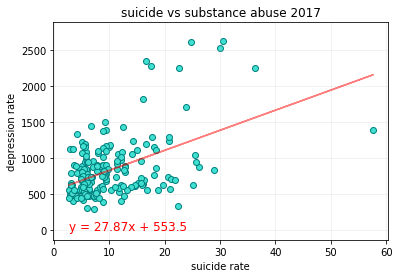

In [35]:
# Generate a scatter plot between suicide rate and depression rate in 2017
x_values = suicide_rate_df["2017"]
y_values = Subs_abuse_df["2017"]
my_plot_function(x_values,y_values,"suicide rate","depression rate","suicide vs substance abuse 2017")

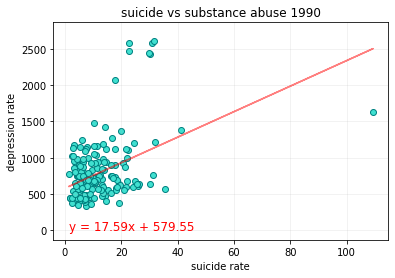

In [36]:
# Generate a scatter plot between suicide rate and substance abuse rate in 2017
x_values = suicide_rate_df["1990"]
y_values = Subs_abuse_df["1990"]
my_plot_function(x_values,y_values,"suicide rate","depression rate","suicide vs substance abuse 1990")

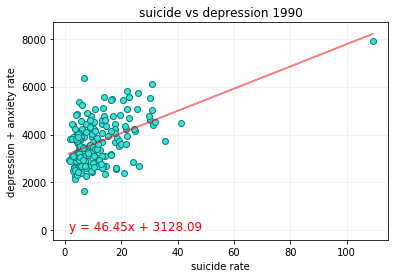

In [14]:
# Generate a scatter plot between suicide rate and depression rate in 2017
x_values = suicide_rate_df["1990"]
y_values = dep_anx_df["1990"]
my_plot_function(x_values,y_values,"suicide rate","depression + anxiety rate","suicide vs depression 1990")

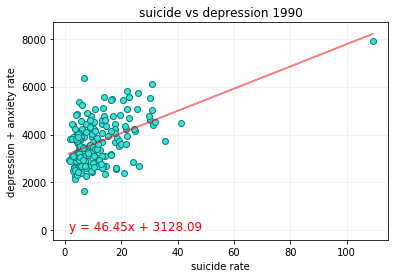

In [15]:
# Generate a scatter plot between suicide rate and depression rate in 2017
x_values = suicide_rate_df["1990"]
y_values = dep_anx_df["1990"]
my_plot_function(x_values,y_values,"suicide rate","depression + anxiety rate","suicide vs depression 1990")

In [16]:
# SUICIDE BY FIREARM RATE MATRIX
# Create base dataframe for Suicide by firearm Rate for all countries ; CauseNo = 721, MetricId = 3 Rate
firearms_df = file[(file["sex_id"]==3) & (file["metric_id"]==3) & (file["measure_id"]==1) & (file["cause_id"] == 721)].round(2)

#create matrix
byfirearm_rate_df = matrix_maker_function(firearms_df ,'location_name','year')
byfirearm_rate_df.rename(columns={"location_name":"Country Name"}, inplace=True)
byfirearm_rate_df.head(1)

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,0.48,0.47,0.45,0.43,0.43,0.42,0.41,0.4,0.39,...,0.34,0.34,0.33,0.32,0.32,0.32,0.31,0.31,0.31,0.31


In [17]:
# PERCENTAGE SUICIDE BY FIREARM
byfirearm_pct_df = suicide_rate_df.filter(['Country Name'], axis=1).reset_index(drop=True)  # create heading column
Time = suicide_rate_df.keys()

for i in range(1,len(Time)):
    byfirearm_pct_df[Time[i]]=(100*byfirearm_rate_df[Time[i]]/suicide_rate_df[Time[i]]).round(2)
    
byfirearm_pct_df.head(1)

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,6.49,6.41,6.45,6.3,6.29,6.2,6.17,6.08,5.97,...,5.93,6.04,5.96,5.86,5.94,5.98,5.85,5.86,5.88,5.9


In [18]:
#suicide_rate_df.sort_values(by='1990', ascending=False)
print(byfirearm_pct_df.sort_values(by='1990', ascending=False)['Country Name'].head())

185    United States
186          Uruguay
7          Argentina
37          Colombia
189        Venezuela
Name: Country Name, dtype: object


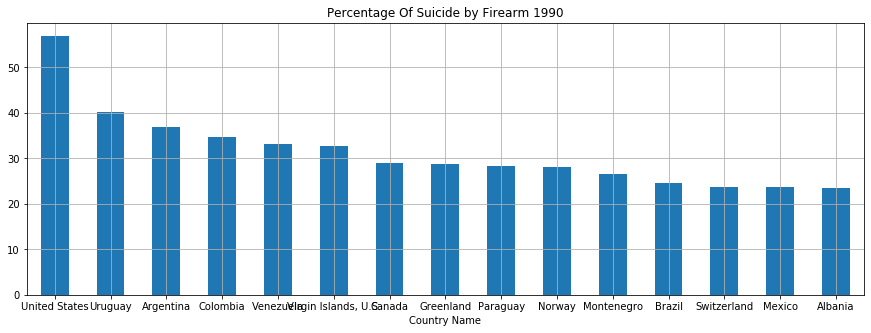

In [19]:
# Generate bar plot for Percentage Of Suicide by Firearm 1990
SuicideByFirearm1990 = byfirearm_pct_df.filter(['Country Name','1990'], axis=1).set_index('Country Name')
SuicideByFirearm1990.sort_values(by='1990', ascending=False,inplace=True)
SuicideByFirearm1990 = SuicideByFirearm1990.iloc[:15,0]
SuicideByFirearm1990.plot(kind="bar", figsize=(15,5), legend = False, rot = 0, grid = True,
                          title ="Percentage Of Suicide by Firearm 1990")
plt.savefig('SuicideByFirearm1990.png')

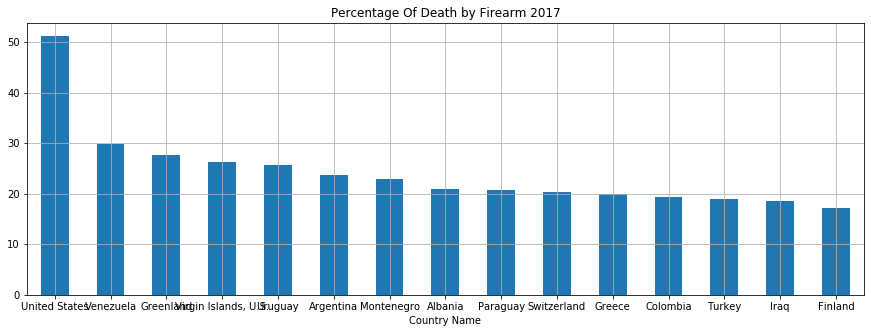

In [20]:
# Generate bar plot for Percentage Of Suicide by Firearm 2017  
SuicideByFirearm1990 = byfirearm_pct_df.filter(['Country Name','2017'], axis=1).set_index('Country Name')
SuicideByFirearm1990.sort_values(by='2017', ascending=False,inplace=True)
SuicideByFirearm1990 = SuicideByFirearm1990.iloc[:15,0]
SuicideByFirearm1990.plot(kind="bar", figsize=(15,5), legend = False, rot = 0, grid = True,
                          title ="Percentage Of Death by Firearm 2017")
plt.savefig('SuicideByFirearm2017.png')

In [21]:
# SUICIDE BY REGION (definision please see http://ghdx.healthdata.org/countries)
# retrieve file and create base dataframe for Suicide for all region ; CauseNo = 718 for selfharm/suicide, MetricId = 3 Rate
file2 = pd.read_csv("GHDx/Resources/IHME-GBD_2017_DATA-3a91bc48-1.csv")
reg_df = file2[(file2["sex_id"]==3) & (file2["metric_id"]==3) & (file2["measure_id"]==1) & (file2["cause_id"] == 721)].round(2)

#create matrix
region_df = matrix_maker_function(reg_df ,'location_name','year')
region_df.rename(columns={"location_name":"Region"}, inplace=True)
region_df.head(1)

,Region,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Africa,0.54,0.54,0.54,0.55,0.55,0.56,0.56,0.57,0.58,...,0.54,0.53,0.53,0.52,0.51,0.5,0.49,0.49,0.49,0.49


In [22]:
file4 = pd.read_csv("GHDx/Resources/IHME-GBD_2017_DATA-0b0c808a-1.csv")

file4_df = file4[(file4["sex_id"]==3) & (file4["metric_id"]==1)  & (file4["location_name"]=="Canada") & (file4["measure_id"]==1)]
file4_df.head(3)


,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
98,1,Deaths,101,Canada,3,Both,22,All Ages,386,Nutritional deficiencies,1,Number,1990,143.542463,151.471457,136.201487
104,1,Deaths,101,Canada,3,Both,22,All Ages,410,Neoplasms,1,Number,1990,55822.485354,56518.770893,54416.565032
128,1,Deaths,101,Canada,3,Both,22,All Ages,491,Cardiovascular diseases,1,Number,1990,73181.597028,74116.468628,72367.591718


In [23]:
death_cause_df = pd.pivot_table(file4_df, index=["cause_name"],values=["val"],columns=["year"])
death_cause_df = pd.DataFrame(death_cause_df.to_records())
death_cause_df.columns = [hdr.replace("('val', ", "").replace(")", "") \
                     for hdr in death_cause_df.columns]
death_cause_df = death_cause_df.sort_values(by='2017', ascending=True).round()

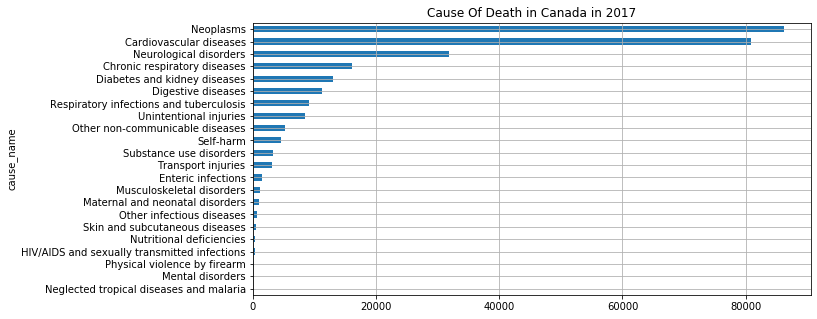

In [24]:
# Generate a horisontal bar plot  
CauseOfDeath = death_cause_df.filter(['cause_name','2017'], axis=1).set_index('cause_name')
CauseOfDeath.plot(kind="barh", figsize=(10,5), legend = False, rot = 0, grid = True, title ="Cause Of Death in Canada in 2017")

In [25]:
# SUICIDE BY AGE - WORLD
# retrieve file 
file3 = pd.read_csv("GHDx/Resources/IHME-GBD_2017_DATA-c50a2fa5-1.csv")

# create base dataframe of cause of death for each age group in 2017 
# location=global location_id=1, MetricId = 1 Number, sex_id = 3 both, measure_id = 1 death , year = 2017
age_temp_df = file3[(file3["location_id"]==1) & (file3["sex_id"]==3) & (file3["metric_id"]==1) & 
               (file3["measure_id"]==1) & (file3["year"]==2017) ].round()
#create matrix
age_mtx = matrix_maker_function(age_temp_df ,'cause_name','age_name')

#clean the matrix
age_mtx.drop([19], axis=0,inplace=True)
age_df = age_mtx.drop(["'5 to 9'","'Under 5'"], axis=1)
age_df.insert(1, "'5 to 9'", age_mtx["'5 to 9'"])
age_df.insert(1, "'Under 5'", age_mtx["'Under 5'"])
age_df = age_df.fillna(0).set_index('cause_name')
age_df.head(1)

,'Under 5','5 to 9','10 to 14','15 to 19','20 to 24','25 to 29','30 to 34','35 to 39','40 to 44','45 to 49','50 to 54','55 to 59','60 to 64','65 to 69','70 to 74','75 to 79','80 to 84','85 to 89','90 to 94','95 plus'
cause_name,,,,,,,,,,,,,,,,,,,,
All causes,5391562.0,412113.0,319630.0,516509.0,709782.0,838974.0,1006999.0,1164779.0,1448494.0,1928487.0,2621964.0,3112789.0,4245092.0,5018790.0,5272671.0,5964171.0,6441449.0,5311646.0,3032676.0,1187152.0


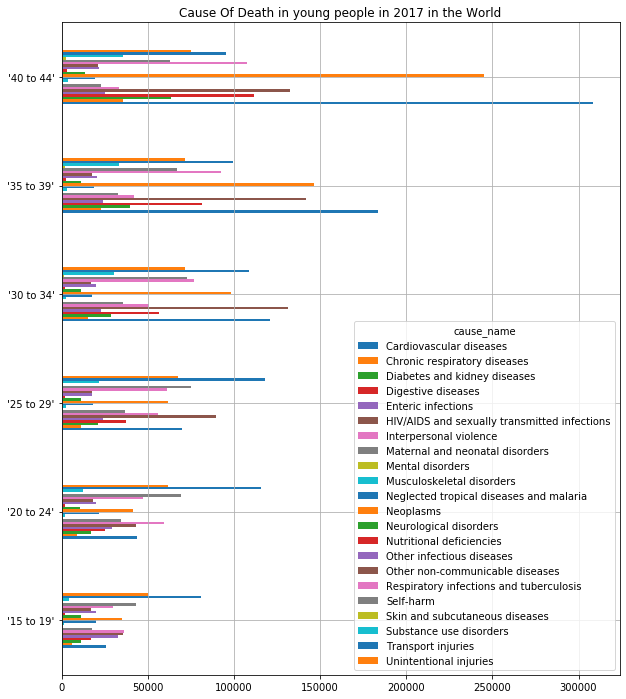

In [26]:
# Generate a horisontal bar plot for Cause Of Death in young people in the World
# modDfObj = dfObj.drop([dfObj.index[0] , dfObj.index[1]])
DeathByAge = age_df.drop(age_df.columns[[0,1,2,9,10,11,12,13,14,15,16,17,18,19]], axis=1)
DeathByAge.drop(DeathByAge.index[0], axis=0, inplace=True)
DeathByAge = DeathByAge.transpose()
DeathByAge.plot(kind="barh", figsize=(10,12), legend = True, rot = 0, grid = True, 
                title ="Cause Of Death in young people in 2017 in the World")
plt.savefig('GHDx/Images/Death in young World.png')

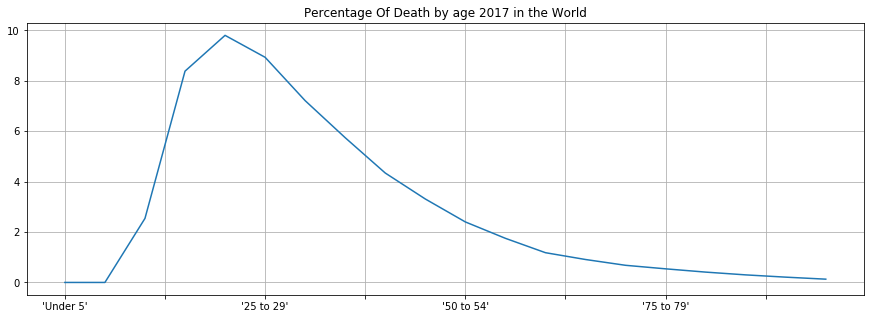

In [27]:
SuicidePct = age_df.transpose()
SuicidePct.insert(0, "Percentage Of Death", (100*SuicidePct["Self-harm"] / SuicidePct["All causes"]))
SuicidePct = SuicidePct.drop(SuicidePct.columns[1:24], axis=1).round(2)
SuicidePct.plot(kind="line", figsize=(15,5), legend = False, grid = True, use_index = True,
                          title ="Percentage Of Death by age 2017 in the World")
plt.savefig('GHDx/Images/SuicidePct.png')

In [28]:
# SUICIDE BY AGE - CANADA
# create base dataframe of cause of death for each age group in 2017 in Canada
# location=global location_id=1, MetricId = 1 Number, sex_id = 3 both, measure_id = 1 death , year = 2017
cnd_age_temp_df = file3[(file3["location_id"]==101) & (file3["sex_id"]==3) & (file3["metric_id"]==1) & 
               (file3["measure_id"]==1) & (file3["year"]==2017) ].round()
#create matrix
cnd_age_mtx = matrix_maker_function(cnd_age_temp_df ,'cause_name','age_name')

#clean the matrix
cnd_age_mtx.drop([19], axis=0,inplace=True)
cnd_age_df = cnd_age_mtx.drop(["'5 to 9'","'Under 5'"], axis=1)
cnd_age_df.insert(1, "'5 to 9'", cnd_age_mtx["'5 to 9'"])
cnd_age_df.insert(1, "'Under 5'", cnd_age_mtx["'Under 5'"])
cnd_age_df = cnd_age_df.fillna(0).set_index('cause_name')
cnd_age_df.head(1)

,'Under 5','5 to 9','10 to 14','15 to 19','20 to 24','25 to 29','30 to 34','35 to 39','40 to 44','45 to 49','50 to 54','55 to 59','60 to 64','65 to 69','70 to 74','75 to 79','80 to 84','85 to 89','90 to 94','95 plus'
cause_name,,,,,,,,,,,,,,,,,,,,
All causes,2091.0,181.0,249.0,804.0,1236.0,1341.0,1557.0,1922.0,2867.0,4722.0,8412.0,12857.0,17151.0,22575.0,27612.0,32216.0,40109.0,44845.0,35147.0,21508.0


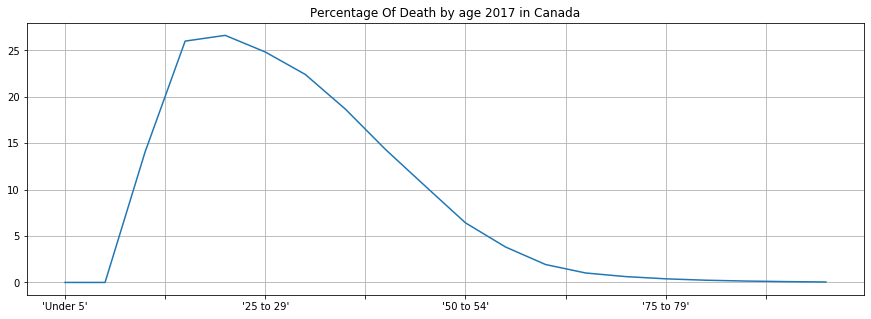

In [29]:
CndSuicidePct = cnd_age_df.transpose()
CndSuicidePct.insert(0, "Percentage Of Death", (100*CndSuicidePct["Self-harm"] / CndSuicidePct["All causes"]))
CndSuicidePct = CndSuicidePct.drop(CndSuicidePct.columns[1:24], axis=1).round(2)
CndSuicidePct.plot(kind="line", figsize=(15,5), legend = False, grid = True, use_index = True,
                          title ="Percentage Of Death by age 2017 in Canada")
plt.savefig('GHDx/Images/CndSuicidePct.png')

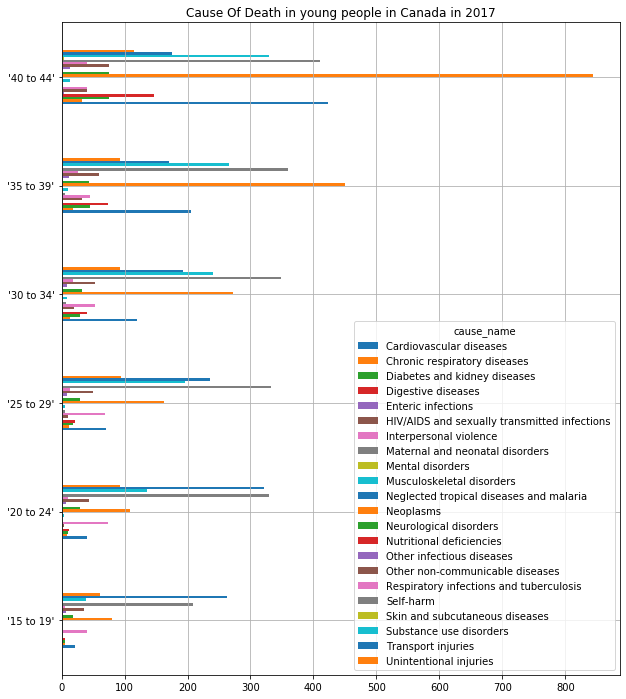

In [30]:
# Generate a horisontal bar plot for Cause Of Death in young people in Canada
# modDfObj = dfObj.drop([dfObj.index[0] , dfObj.index[1]])
DeathByAge = cnd_age_df.drop(cnd_age_df.columns[[0,1,2,9,10,11,12,13,14,15,16,17,18,19]], axis=1)
DeathByAge.drop(DeathByAge.index[0], axis=0, inplace=True)
DeathByAge = DeathByAge.transpose()
DeathByAge.plot(kind="barh", figsize=(10,12), legend = True, rot = 0, grid = True, 
                title ="Cause Of Death in young people in Canada in 2017")
plt.savefig('GHDx/Images/Death in young in Canada.png')